# Predicting the Adoptability of Shelter Animals: A Classification Analysis

### Group 2
### Members: 
- 

In [37]:
library(readr)
library(tidyverse)
library(ggplot2) 

## Summary

## Introduction

## Methods and Results

*Written explanation:* 

In [23]:
animals <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-03-04/longbeach.csv", show_col_types = FALSE) 
head(animals)

animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_condition,intake_type,⋯,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<chr>,<chr>,⋯,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
A693708,*charlien,dog,white,NA,Female,2013-02-21,2023-02-20,ill mild,stray,⋯,2023-02-26,"[2600 BLK LONG BEACH BLVD, LONG BEACH CA, 90806",Long Beach,euthanasia,ill severe,33.80479,-118.1889,TRUE,FALSE,"33.8047935, -118.1889261"
A708149,NA,reptile,brown,green,Unknown,NA,2023-10-03,normal,stray,⋯,2023-10-03,"`600 BLK E HARCOURT, LB 90805",Long Beach,rescue,other resc,33.86800,-118.2009,FALSE,TRUE,"33.8679994, -118.2009307"
A638068,NA,bird,green,red,Unknown,NA,2020-01-01,injured severe,wildlife,⋯,2020-01-01,"0 BLK GRAND AVE, LONG BEACH, CA 90803",Long Beach,euthanasia,inj severe,33.76048,-118.1481,TRUE,FALSE,"33.7604783, -118.1480912"
A639310,NA,bird,white,gray,Unknown,NA,2020-02-02,ill severe,wildlife,⋯,2020-02-02,"0 BLK TEMPLE AVE, LONG BEACH, CA 90803",Long Beach,transfer,lbah,33.76246,-118.1597,FALSE,TRUE,"33.7624598, -118.1596777"
A618968,*morgan,cat,black,white,Female,2014-12-18,2018-12-18,injured severe,stray,⋯,2019-01-13,"0 BLK W ZANE ST, LONG BEACH, CA 90805",Long Beach,rescue,littlelion,33.84950,-118.1949,FALSE,TRUE,"33.8495009, -118.1949053"
A730385,*brandon,rabbit,black,white,Neutered,2023-04-19,2024-10-18,normal,stray,⋯,2024-11-15,00 AQUARIUM WAY LONG BEACH CA 90802,Long Beach,adoption,web,33.76399,-118.1944,FALSE,TRUE,"33.7639859, -118.1944096"


In [42]:
#cleaning the data: 
animals <- animals %>% 
    select(animal_type, primary_color, sex, dob, intake_condition, intake_type, outcome_type) %>% 
    #filter(animal_type != "other") %>%
    na.omit()

animals$outcome_group <- recode(animals$outcome_type,
  "adoption" = "Adopted",
  "foster" = "Adopted",
  "foster to adopt" = "Adopted",
  "homefirst" = "Adopted",
  "rescue" = "Adopted",
  .default = "Not Adopted"  # Everything else is considered "Not Adopted"
)

head(animals)

animal_type,primary_color,sex,dob,intake_condition,intake_type,outcome_type,outcome_group
<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
dog,white,Female,2013-02-21,ill mild,stray,euthanasia,Not Adopted
cat,black,Female,2014-12-18,injured severe,stray,rescue,Adopted
rabbit,black,Neutered,2023-04-19,normal,stray,adoption,Adopted
cat,black,Unknown,2017-08-21,under age/weight,stray,rescue,Adopted
dog,cream,Spayed,2007-12-15,aged,owner surrender,rescue,Adopted
cat,gray tabby,Female,2015-01-11,normal,stray,transfer,Not Adopted


In [45]:
#summary of the data: 
summary(animals)
table(animals$outcome_group)
table(animals$outcome_type)
table(animals$intake_condition)

 animal_type        primary_color          sex                 dob            
 Length:25256       Length:25256       Length:25256       Min.   :1993-05-28  
 Class :character   Class :character   Class :character   1st Qu.:2016-06-03  
 Mode  :character   Mode  :character   Mode  :character   Median :2018-09-23  
                                                          Mean   :2018-07-12  
                                                          3rd Qu.:2021-12-28  
                                                          Max.   :2031-03-30  
 intake_condition   intake_type        outcome_type       outcome_group     
 Length:25256       Length:25256       Length:25256       Length:25256      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                              


    Adopted Not Adopted 
      12213       13043 


               adoption           community cat                    died 
                   6149                     334                     553 
               disposal               duplicate              euthanasia 
                     35                      26                    3780 
                 foster         foster to adopt               homefirst 
                      7                     164                      86 
                missing                  rescue         return to owner 
                     53                    5807                    3107 
       return to rescue  return to wild habitat shelter, neuter, return 
                     46                      95                     896 
               transfer               transport   trap, neuter, release 
                   3956                     127                      35 


              aged     behavior  mild behavior  moderate   behavior  severe 
               153                 68                124                 68 
             feral          fractious         i/i report           ill mild 
               278                633                220               1030 
    ill moderatete         ill severe      injured  mild  injured  moderate 
               741                894                687                748 
   injured  severe         intakeexam             normal   under age/weight 
              1226                  1              12639               5686 
  welfare seizures 
                60 

### Exploratory Analysis Visualizations 

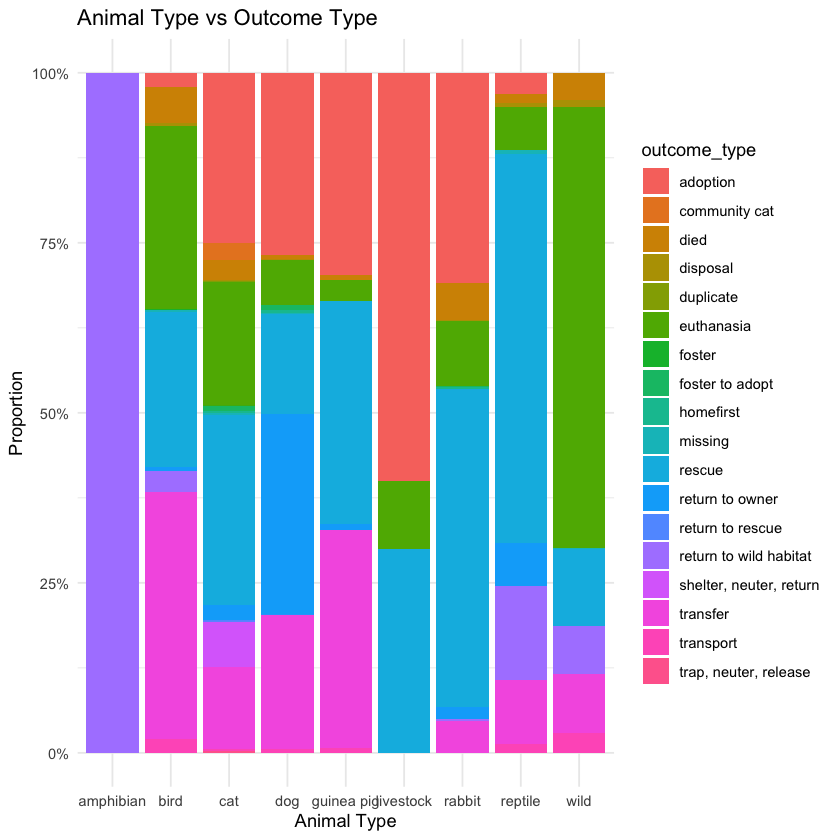

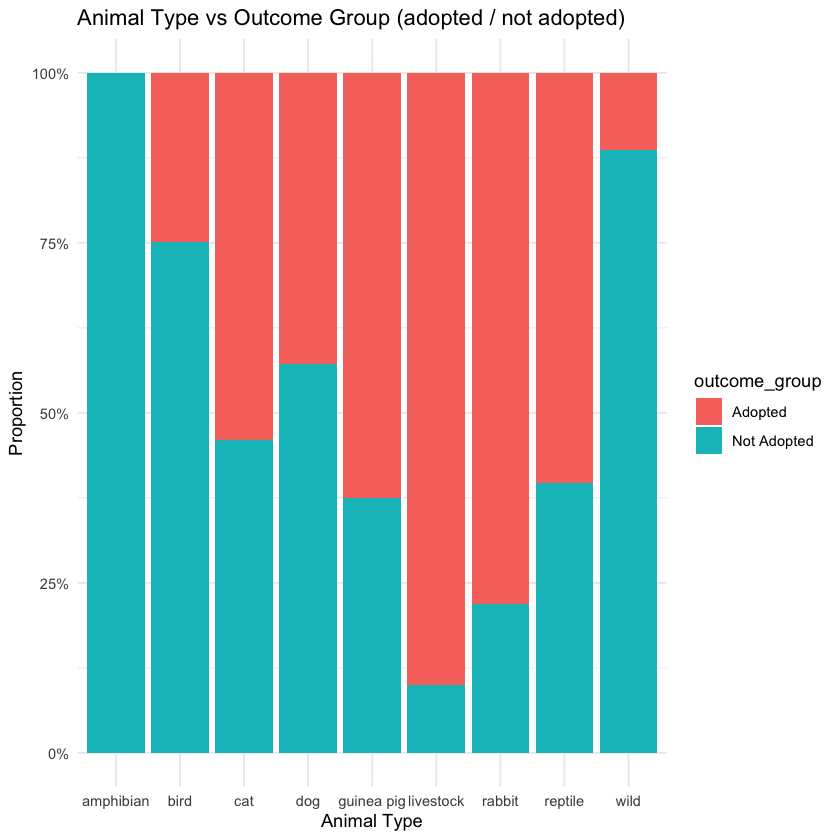

In [55]:
ggplot(animals, aes(x = animal_type, fill = outcome_type)) +
  geom_bar(position = "fill") +  
  labs(title = "Animal Type vs Outcome Type",
       x = "Animal Type",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent)

ggplot(animals, aes(x = animal_type, fill = outcome_group)) +
  geom_bar(position = "fill") + 
  labs(title = "Animal Type vs Outcome Group (adopted / not adopted)",
       x = "Animal Type",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent)

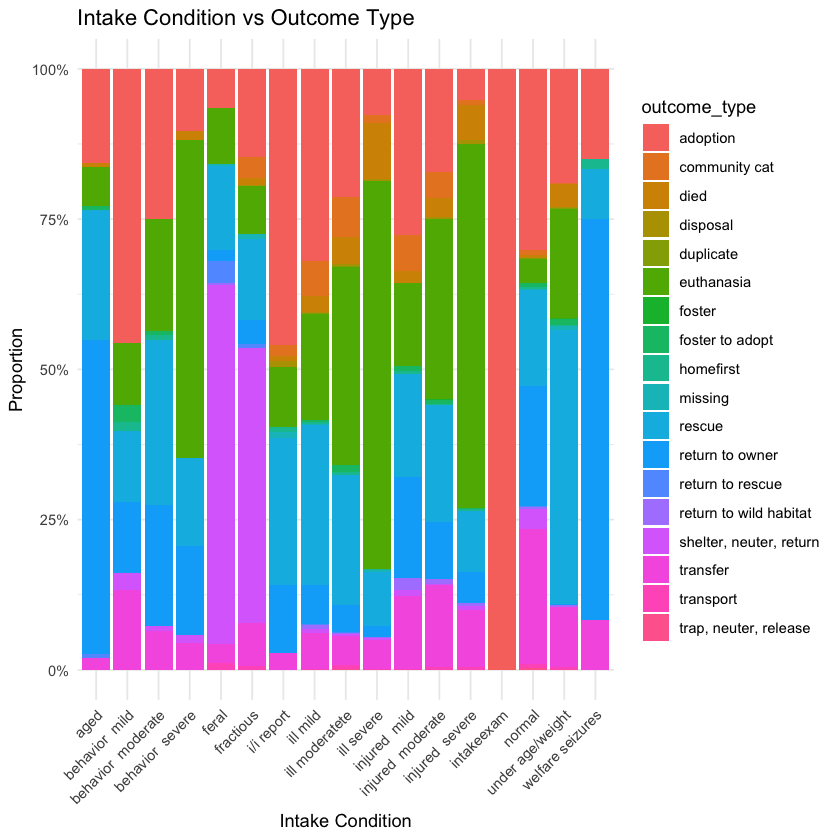

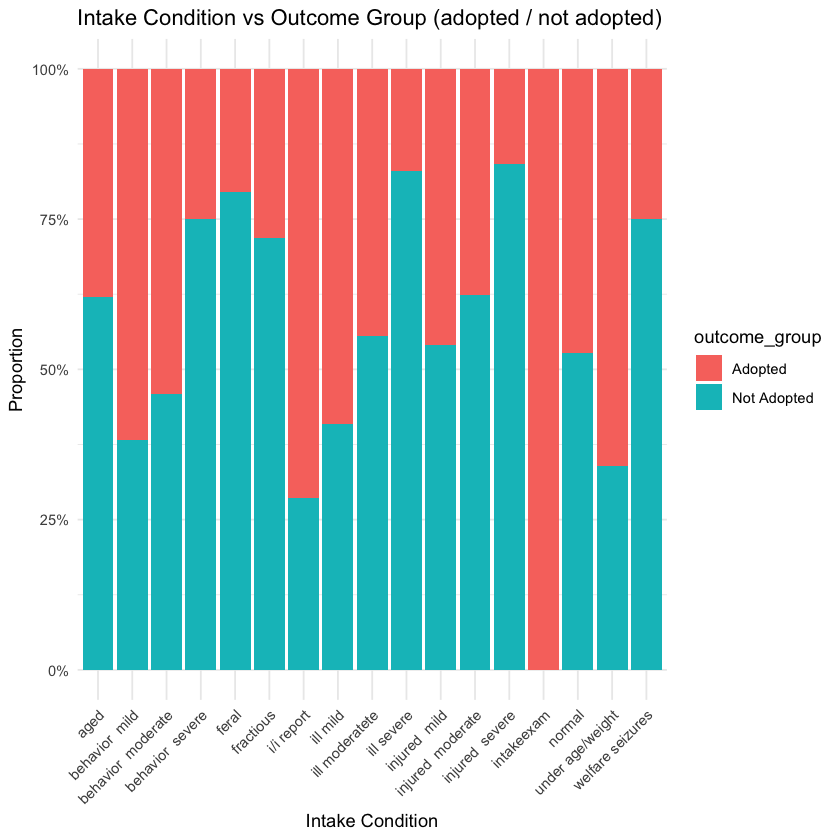

In [75]:
ggplot(animals, aes(x = intake_condition, fill = outcome_type)) +
  geom_bar(position = "fill") + 
  labs(title = "Intake Condition vs Outcome Type",
       x = "Intake Condition",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggplot(animals, aes(x = intake_condition, fill = outcome_group)) +
  geom_bar(position = "fill") +
  labs(title = "Intake Condition vs Outcome Group (adopted / not adopted)",
       x = "Intake Condition",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

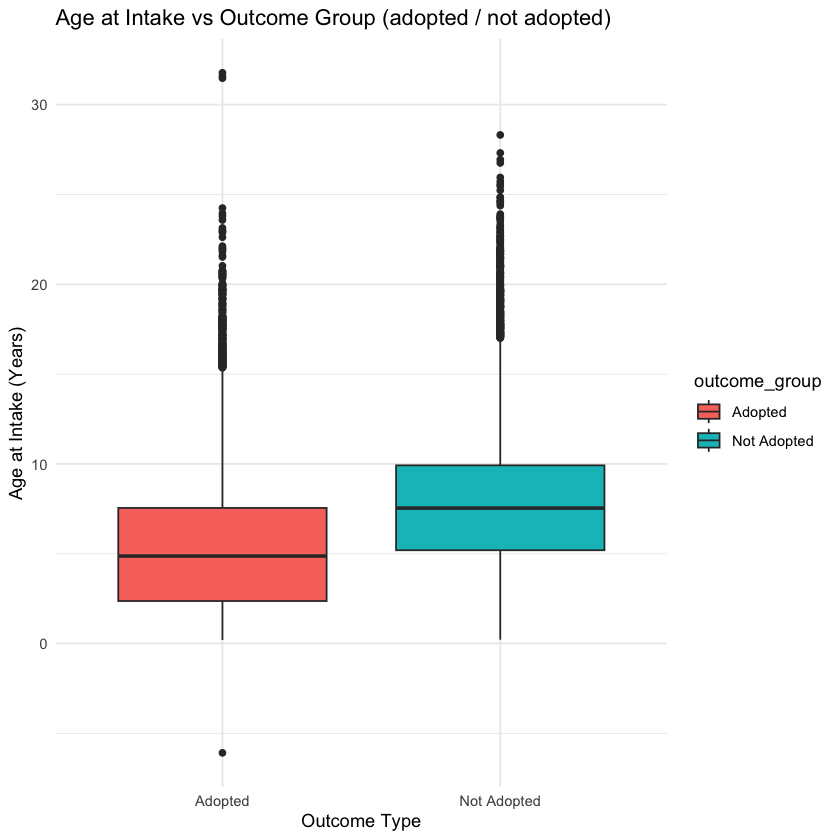

In [63]:
animals$age_at_intake <- as.numeric(difftime(Sys.Date(), animals$dob, units = "days")) / 365

# Boxplot of age at intake vs outcome_type
ggplot(animals, aes(x = outcome_group, y = age_at_intake, fill = outcome_group)) +
  geom_boxplot() +
  labs(title = "Age at Intake vs Outcome Group (adopted / not adopted)",
       x = "Outcome Type",
       y = "Age at Intake (Years)") +
  theme_minimal()

### Classification Analysis 

In [67]:
animals$outcome_binary <- ifelse(animals$outcome_group == "Adopted", 1, 0)

table(animals$outcome_binary)


    0     1 
13043 12213 

## Discussion

## References